5 45.0
5 11.666666666666664
5.000000000000002 5
11.666666666666671 5
45.00000000000007 5


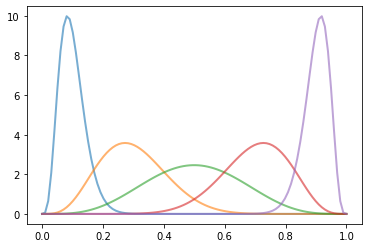

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

a, b = 3., 6.
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

mm = np.arange(0.1, 1.0, 0.2)
c = 5
aa = [c if m <= 0.5 else c * m / (1-m) for m in mm]
bb = [c * (1-m) / m if m <= 0.5 else c for m in mm]

x = np.linspace(0, 1, 100)

fig, ax = plt.subplots(1, 1)

for a, b in zip(aa, bb):
    ax.plot(x, beta.pdf(x, a, b),
            lw=2, alpha=0.6, label='beta pdf')
    print(a, b)

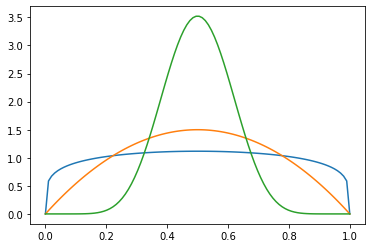

In [3]:
m = 0.5
plt.plot(x, beta.pdf(x, 1.2, 1.2 * (1-m) / m))
plt.plot(x, beta.pdf(x, 2, 2 * (1-m) / m))
plt.plot(x, beta.pdf(x, 10, 10 * (1-m) / m))

0.8 7.2
6.000000000000001 14.0
12.000000000000004 11.999999999999996
13.999999999999998 5.999999999999997
7.199999999999991 0.7999999999999978


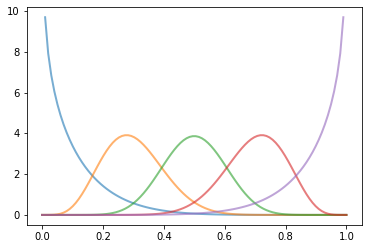

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

a, b = 3., 6.
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

shape_a = lambda m, var: m * ( m * (1 - m) / var - 1)
shape_b = lambda m, var: (1 - m) * ( m * (1 - m) / var - 1)

mm = np.arange(0.1, 1.0, 0.2)

var = 5
aa = [shape_a(m, var) for m in mm]
bb = [shape_b(m, var) for m in mm]

x = np.linspace(0, 1, 100)

fig, ax = plt.subplots(1, 1)

for a, b in zip(aa, bb):
    ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='beta pdf')
    print(a, b)

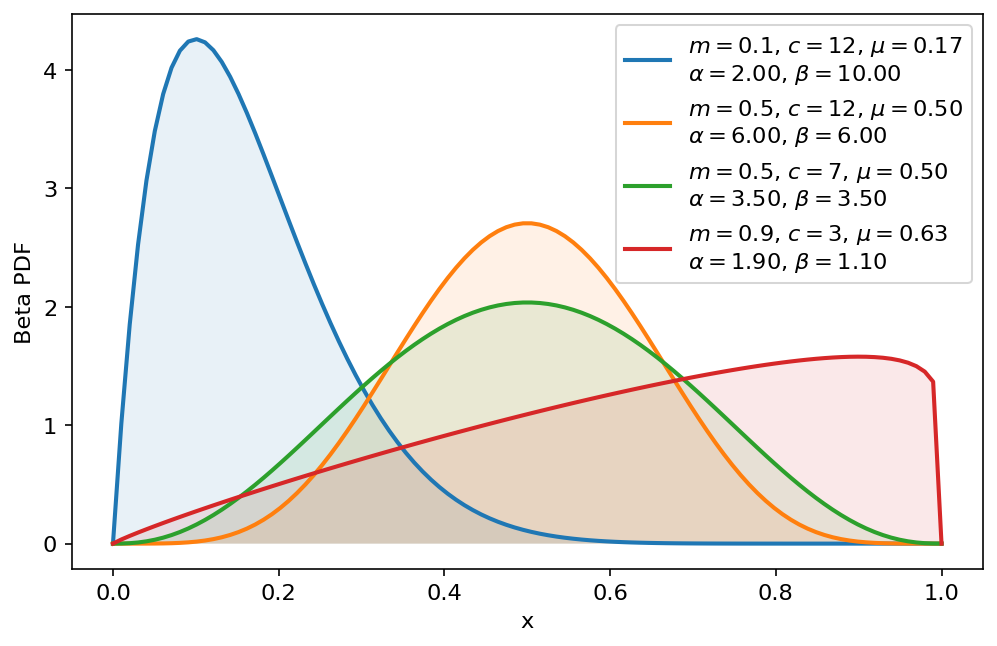

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

plt.rcParams.update({"figure.dpi": 147, "font.size": 11})

concentrations = [10, 10, 5, 1.0]
modes = [0.1, 0.5, 0.5, 0.9]

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
x = np.linspace(0, 1, 100)

for c, m in zip(concentrations, modes):
    # Calculate the alpha and beta shape parameters for each mode
    a = 1 + (c) * m
    b = 1 + (c) * (1 - m)

    ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=1., 
            label=fr"$m={m:.1f}$, $c={c+2:.0f}$, $\mu={a/(a+b):.2f}$"
            + "\n"+fr"$\alpha={a:.2f}$, $\beta={b:.2f}$")
    ax.fill(x, beta.pdf(x, a, b), alpha=0.1)

ax.legend()    
plt.xlabel("x")
plt.ylabel(r"Beta PDF")
plt.show()